In [1]:
# Als het weer nodig is, check je huidige working directory
import os
print(os.getcwd())

# Pas je working directory aan indien gewenst
path = 'C:\\Users\\rburrus\\Desktop\\Jupyter Notebook' # zet hier wat voor jou goed is
os.chdir(path)
print(os.getcwd())

C:\Users\rburrus\Downloads
C:\Users\rburrus\Desktop\Jupyter Notebook


In [2]:
# Importeer relevante pakketjes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None) # maakt onbeperkt aantal kolommen zichtbaar

## 1. 
**Importeer de dataset Honda.csv**

In [3]:
df = pd.read_csv('Honda.csv')
df.head()

,Kenteken,Voertuigsoort,Merk,Handelsbenaming,Vervaldatum.APK,Datum_tenaamstelling,Bruto.BPM,Inrichting,Aantal.zitplaatsen,Eerste.kleur,Tweede.kleur,Aantal.cilinders,Cilinderinhoud,Massa.ledig.voertuig,Toegestane.maximum.massa.voertuig,Massa.rijklaar,Maximum.massa.trekken.ongeremd,Maximum.trekken.massa.geremd,Zuinigheidslabel,Datum.eerste.toelating,Datum.eerste.afgifte.Nederland,Wacht.op.keuren,Catalogusprijs,WAM.verzekerd,Maximale.constructiesnelheid..brom.snorfiets.,Laadvermogen,Oplegger.geremd,Aanhangwagen.autonoom.geremd,Aanhangwagen.middenas.geremd,Vermogen..brom.snorfiets.,Aantal.staanplaatsen,Aantal.deuren,Aantal.wielen,Afstand.hart.koppeling.tot.achterzijde.voertuig,Afstand.voorzijde.voertuig.tot.hart.koppeling,Afwijkende.maximum.snelheid,Lengte,Breedte,Europese.voertuigcategorie,Europese.voertuigcategorie.toevoeging,Europese.uitvoeringcategorie.toevoeging,Plaats.chassisnummer,Technische.max..massa.voertuig,Type,Type.gasinstallatie,Typegoedkeuringsnummer,Variant,Uitvoering,Volgnummer.wijziging.EU.typegoedkeuring,Vermogen.massarijklaar,Wielbasis,Export.indicator,Openstaande.terugroepactie.indicator,Vervaldatum.tachograaf,Taxi.indicator,Maximum.massa.samenstelling,Aantal.rolstoelplaatsen,Maximum.ondersteunende.snelheid,API.Gekentekende_voertuigen_assen,API.Gekentekende_voertuigen_brandstof,API.Gekentekende_voertuigen_carrosserie,API.Gekentekende_voertuigen_carrosserie_specifiek,API.Gekentekende_voertuigen_voertuigklasse
0,MN84HV,Motorfiets,HONDA,VT 500 C,NaN,20200612.0,NaN,Niet geregistreerd,NaN,N.v.t.,N.v.t.,2.0,491.0,179.0,NaN,186.0,NaN,NaN,NaN,19830630,19920530,Geen verstrekking in Open Data,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,0.0,NaN,0.0,0.0,L3,e,e,r. tegen balhoofd,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.20,149.0,Nee,Nee,NaN,Nee,0.0,NaN,NaN,https://opendata.rdw.nl/resource/3huj-srit.json,https://opendata.rdw.nl/resource/8ys7-d773.json,https://opendata.rdw.nl/resource/vezc-m2t6.json,https://opendata.rdw.nl/resource/jhie-znh9.json,https://opendata.rdw.nl/resource/kmfi-hrps.json
1,XR0428,Motorfiets,HONDA,CB750F,NaN,20200923.0,NaN,Niet geregistreerd,NaN,N.v.t.,N.v.t.,4.0,736.0,246.0,NaN,253.0,NaN,NaN,NaN,19760706,19760706,Geen verstrekking in Open Data,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,0.0,NaN,0.0,0.0,L3,e,e,r. tegen balhoofd,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.19,147.0,Nee,Nee,NaN,Nee,0.0,NaN,NaN,https://opendata.rdw.nl/resource/3huj-srit.json,https://opendata.rdw.nl/resource/8ys7-d773.json,https://opendata.rdw.nl/resource/vezc-m2t6.json,https://opendata.rdw.nl/resource/jhie-znh9.json,https://opendata.rdw.nl/resource/kmfi-hrps.json
2,MR56TD,Motorfiets,HONDA,NTV 650,NaN,20190813.0,644.0,Niet geregistreerd,NaN,N.v.t.,N.v.t.,2.0,647.0,211.0,NaN,218.0,NaN,NaN,NaN,19930525,19930525,Geen verstrekking in Open Data,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,L3,e,e,r. tegen balhoofd,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.19,147.0,Ja,Nee,NaN,Nee,0.0,NaN,NaN,https://opendata.rdw.nl/resource/3huj-srit.json,https://opendata.rdw.nl/resource/8ys7-d773.json,https://opendata.rdw.nl/resource/vezc-m2t6.json,https://opendata.rdw.nl/resource/jhie-znh9.json,https://opendata.rdw.nl/resource/kmfi-hrps.json
3,43MLXT,Motorfiets,HONDA,HONDA GL1800,NaN,20200901.0,3916.0,Niet geregistreerd,2.0,N.v.t.,N.v.t.,6.0,1832.0,353.0,NaN,360.0,NaN,NaN,NaN,20010915,20200615,Geen verstrekking in Open Data,NaN,Nee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,L3,NaN,NaN,r.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.24,169.0,Nee,Nee,NaN,Nee,NaN,NaN,NaN,https://opendata.rdw.nl/resource/3huj-srit.json,https://opendata.rdw.nl/resource/8ys7-d773.json,https://opendata.rdw.nl/resource/vezc-m2t6.json,https://opendata.rdw.nl/resource/jhie-znh9.json,https://opendata.rdw.nl/resource/kmfi-hrps.json
4,MDXD06,Motorfiets,HONDA,RC44,NaN,20200729.0,1153.0,Niet geregistreerd,NaN,N.v.t.,N.v.t.,2.0,745.0,239.0,426.0,246.0,NaN,NaN,NaN,20020306,20020306,Geen verstrekking in Open Data,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,0.0,NaN,0.0,0.0,L3,e,e,r. tegen balho

## 2. 
**a. Inspecteer de waarde Massa.ledig.voertuig middels een histogram. Zijn er waardes die als
outlier gezien kunnen worden? Verwijder deze. Doe hetzelfde voor de variabele
Massa.rijklaar** <br>
Video data inspecteren op outliers: https://youtu.be/Gxlco3CCR9I

<AxesSubplot:>

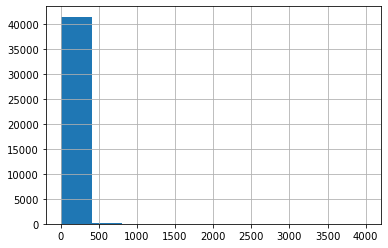

In [4]:
# Plot een histogram
df['Massa.ledig.voertuig'].hist()

<AxesSubplot:>

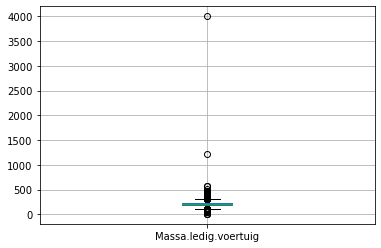

In [5]:
# Plot een boxplot
df.boxplot(column='Massa.ledig.voertuig')

<AxesSubplot:>

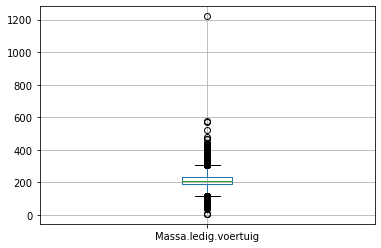

In [6]:
# Als je maar de ergste uitschieter verwijdert, krijg je deze
df = df[df['Massa.ledig.voertuig'] < 1500]
df.boxplot(column='Massa.ledig.voertuig')

<AxesSubplot:>

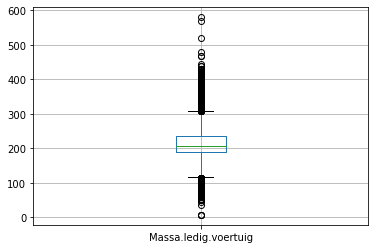

In [7]:
# Kan ook de tweede hoogste waarde uithalen
df = df[df['Massa.ledig.voertuig'] < 1000]
df.boxplot(column='Massa.ledig.voertuig')

<AxesSubplot:>

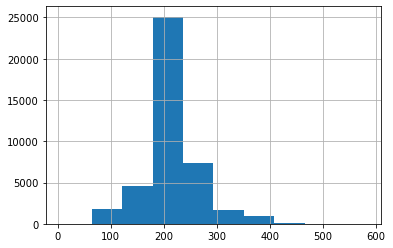

In [8]:
# Check de histogram weer
df['Massa.ledig.voertuig'].hist()

<AxesSubplot:>

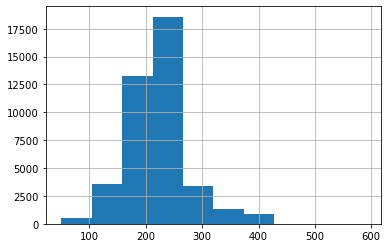

In [9]:
# Nu hetzelfde doen met 'Massa.rijklaar'
df['Massa.rijklaar'].hist()

<AxesSubplot:>

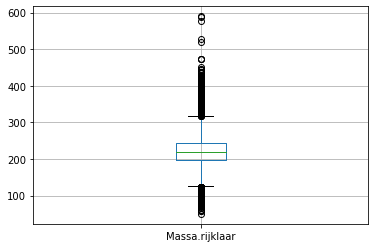

In [10]:
# Plot een boxplot (de uitschieters zijn veel minder erg, dus misschien niks uit de kolom halen)
df.boxplot(column='Massa.rijklaar')

**b. Inspecteer waardes middels een 2-d plot voor de variabelen massa.ledig.voertuig en
massa.rijklaar . Welke additionele waarde(s) zou je nog kunnen verwijderen?**

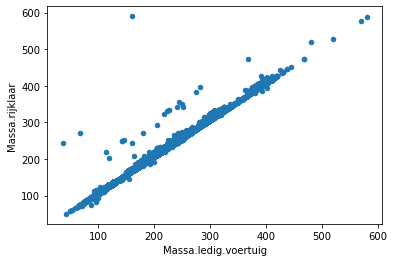

In [11]:
df.plot.scatter(x='Massa.ledig.voertuig',y='Massa.rijklaar')
plt.show()

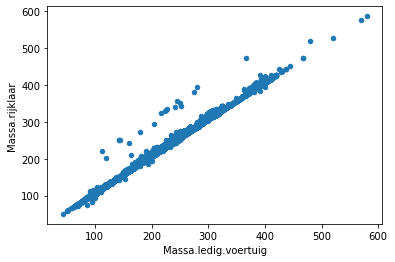

In [12]:
# Verwijder rijen waarbij Massa.rijkklaar meer dan 2 keer zo hoog is als Massa.ledig.voertuig
df = df[df['Massa.rijklaar']/df['Massa.ledig.voertuig'] < 2]
df.plot.scatter(x='Massa.ledig.voertuig',y='Massa.rijklaar')
plt.show()

## 3. 
**a. Zet de variabele Datum_tenaamstelling in Date format om.**
Video: https://www.youtube.com/watch?v=4WLtGZ-mbjc&list=PLwkTCAI_gJjW10xaAJpdqeQx7EQgFolfG&index=13 

In [13]:
# Eerst check de data type (is voorlopig een float)
df['Datum_tenaamstelling'].head()

0    20200612.0
1    20200923.0
2    20190813.0
3    20200901.0
4    20200729.0
Name: Datum_tenaamstelling, dtype: float64

In [14]:
# Maak gebruik van assign() en pd.to_datetime om de variabele om te zetten
df = df.assign(Datum_tenaamstelling = pd.to_datetime(df['Datum_tenaamstelling'], format='%Y%m%d') )
print(df['Datum_tenaamstelling'].head())
df.head()

0   2020-06-12
1   2020-09-23
2   2019-08-13
3   2020-09-01
4   2020-07-29
Name: Datum_tenaamstelling, dtype: datetime64[ns]


,Kenteken,Voertuigsoort,Merk,Handelsbenaming,Vervaldatum.APK,Datum_tenaamstelling,Bruto.BPM,Inrichting,Aantal.zitplaatsen,Eerste.kleur,Tweede.kleur,Aantal.cilinders,Cilinderinhoud,Massa.ledig.voertuig,Toegestane.maximum.massa.voertuig,Massa.rijklaar,Maximum.massa.trekken.ongeremd,Maximum.trekken.massa.geremd,Zuinigheidslabel,Datum.eerste.toelating,Datum.eerste.afgifte.Nederland,Wacht.op.keuren,Catalogusprijs,WAM.verzekerd,Maximale.constructiesnelheid..brom.snorfiets.,Laadvermogen,Oplegger.geremd,Aanhangwagen.autonoom.geremd,Aanhangwagen.middenas.geremd,Vermogen..brom.snorfiets.,Aantal.staanplaatsen,Aantal.deuren,Aantal.wielen,Afstand.hart.koppeling.tot.achterzijde.voertuig,Afstand.voorzijde.voertuig.tot.hart.koppeling,Afwijkende.maximum.snelheid,Lengte,Breedte,Europese.voertuigcategorie,Europese.voertuigcategorie.toevoeging,Europese.uitvoeringcategorie.toevoeging,Plaats.chassisnummer,Technische.max..massa.voertuig,Type,Type.gasinstallatie,Typegoedkeuringsnummer,Variant,Uitvoering,Volgnummer.wijziging.EU.typegoedkeuring,Vermogen.massarijklaar,Wielbasis,Export.indicator,Openstaande.terugroepactie.indicator,Vervaldatum.tachograaf,Taxi.indicator,Maximum.massa.samenstelling,Aantal.rolstoelplaatsen,Maximum.ondersteunende.snelheid,API.Gekentekende_voertuigen_assen,API.Gekentekende_voertuigen_brandstof,API.Gekentekende_voertuigen_carrosserie,API.Gekentekende_voertuigen_carrosserie_specifiek,API.Gekentekende_voertuigen_voertuigklasse
0,MN84HV,Motorfiets,HONDA,VT 500 C,NaN,2020-06-12,NaN,Niet geregistreerd,NaN,N.v.t.,N.v.t.,2.0,491.0,179.0,NaN,186.0,NaN,NaN,NaN,19830630,19920530,Geen verstrekking in Open Data,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,0.0,NaN,0.0,0.0,L3,e,e,r. tegen balhoofd,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.20,149.0,Nee,Nee,NaN,Nee,0.0,NaN,NaN,https://opendata.rdw.nl/resource/3huj-srit.json,https://opendata.rdw.nl/resource/8ys7-d773.json,https://opendata.rdw.nl/resource/vezc-m2t6.json,https://opendata.rdw.nl/resource/jhie-znh9.json,https://opendata.rdw.nl/resource/kmfi-hrps.json
1,XR0428,Motorfiets,HONDA,CB750F,NaN,2020-09-23,NaN,Niet geregistreerd,NaN,N.v.t.,N.v.t.,4.0,736.0,246.0,NaN,253.0,NaN,NaN,NaN,19760706,19760706,Geen verstrekking in Open Data,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,0.0,NaN,0.0,0.0,L3,e,e,r. tegen balhoofd,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.19,147.0,Nee,Nee,NaN,Nee,0.0,NaN,NaN,https://opendata.rdw.nl/resource/3huj-srit.json,https://opendata.rdw.nl/resource/8ys7-d773.json,https://opendata.rdw.nl/resource/vezc-m2t6.json,https://opendata.rdw.nl/resource/jhie-znh9.json,https://opendata.rdw.nl/resource/kmfi-hrps.json
2,MR56TD,Motorfiets,HONDA,NTV 650,NaN,2019-08-13,644.0,Niet geregistreerd,NaN,N.v.t.,N.v.t.,2.0,647.0,211.0,NaN,218.0,NaN,NaN,NaN,19930525,19930525,Geen verstrekking in Open Data,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,L3,e,e,r. tegen balhoofd,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.19,147.0,Ja,Nee,NaN,Nee,0.0,NaN,NaN,https://opendata.rdw.nl/resource/3huj-srit.json,https://opendata.rdw.nl/resource/8ys7-d773.json,https://opendata.rdw.nl/resource/vezc-m2t6.json,https://opendata.rdw.nl/resource/jhie-znh9.json,https://opendata.rdw.nl/resource/kmfi-hrps.json
3,43MLXT,Motorfiets,HONDA,HONDA GL1800,NaN,2020-09-01,3916.0,Niet geregistreerd,2.0,N.v.t.,N.v.t.,6.0,1832.0,353.0,NaN,360.0,NaN,NaN,NaN,20010915,20200615,Geen verstrekking in Open Data,NaN,Nee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,L3,NaN,NaN,r.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.24,169.0,Nee,Nee,NaN,Nee,NaN,NaN,NaN,https://opendata.rdw.nl/resource/3huj-srit.json,https://opendata.rdw.nl/resource/8ys7-d773.json,https://opendata.rdw.nl/resource/vezc-m2t6.json,https://opendata.rdw.nl/resource/jhie-znh9.json,https://opendata.rdw.nl/resource/kmfi-hrps.json
4,MDXD06,Motorfiets,HONDA,RC44,NaN,2020-07-29,1153.0,Niet geregistreerd,NaN,N.v.t.,N.v.t.,2.0,745.0,239.0,426.0,246.0,NaN,NaN,NaN,20020306,20020306,Geen verstrekking in Open Data,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,0.0,NaN,0.0,0.0,L3,e,e,r. tegen balho

## 4. 
**Controleer of er NA-waardes in de variabele Bruto.BPM zitten.** <br>
Video behandelen missing data: https://youtu.be/Gxlco3CCR9I?t=502 <br>

**a. Maak een nieuwe variabele flag, die 1 is indien Bruto.BPM een NA-waarde bevat, en 0 wanneer er input is.**

In [15]:
# Check hoeveel NaN's  er zijn
pd.isna(df['Bruto.BPM']).sum()

9718

In [16]:
# Maak 'flag' met gebruik van assign(), np.where() en isna() 
df = df.assign(flag = np.where(df['Bruto.BPM'].isna(),1,0))

# Bekijk de head van Bruto.BPM en je nieuwe kolom te controleren of het gelukt is
print(df['Bruto.BPM'].head())
df['flag'].head()

0       NaN
1       NaN
2     644.0
3    3916.0
4    1153.0
Name: Bruto.BPM, dtype: float64


0    1
1    1
2    0
3    0
4    0
Name: flag, dtype: int32

**b. Vul de NA-waardes in met**

i. Gemiddelde van de waarde

ii. Mediaan van de waarde 

iii. Interpolatie van bovenstaande onderstaande waarde

**Let op: om deze drie methoden in rij te kunnen doen, moet je eerst een kopie van je dataframe maken (anders wordt alle NaN's ingevuld met je gemiddelde en dan ziet de volgende stap geen NaN's meer)**

In [17]:
# i. Gemiddelde: maak direct gebruik van fillna(), dus heb je 'flag' niet nodig
df_gem = df.copy()

df_gem['Bruto.BPM'].fillna(df_gem['Bruto.BPM'].mean(), inplace=True)
df_gem.head()

,Kenteken,Voertuigsoort,Merk,Handelsbenaming,Vervaldatum.APK,Datum_tenaamstelling,Bruto.BPM,Inrichting,Aantal.zitplaatsen,Eerste.kleur,Tweede.kleur,Aantal.cilinders,Cilinderinhoud,Massa.ledig.voertuig,Toegestane.maximum.massa.voertuig,Massa.rijklaar,Maximum.massa.trekken.ongeremd,Maximum.trekken.massa.geremd,Zuinigheidslabel,Datum.eerste.toelating,Datum.eerste.afgifte.Nederland,Wacht.op.keuren,Catalogusprijs,WAM.verzekerd,Maximale.constructiesnelheid..brom.snorfiets.,Laadvermogen,Oplegger.geremd,Aanhangwagen.autonoom.geremd,Aanhangwagen.middenas.geremd,Vermogen..brom.snorfiets.,Aantal.staanplaatsen,Aantal.deuren,Aantal.wielen,Afstand.hart.koppeling.tot.achterzijde.voertuig,Afstand.voorzijde.voertuig.tot.hart.koppeling,Afwijkende.maximum.snelheid,Lengte,Breedte,Europese.voertuigcategorie,Europese.voertuigcategorie.toevoeging,Europese.uitvoeringcategorie.toevoeging,Plaats.chassisnummer,Technische.max..massa.voertuig,Type,Type.gasinstallatie,Typegoedkeuringsnummer,Variant,Uitvoering,Volgnummer.wijziging.EU.typegoedkeuring,Vermogen.massarijklaar,Wielbasis,Export.indicator,Openstaande.terugroepactie.indicator,Vervaldatum.tachograaf,Taxi.indicator,Maximum.massa.samenstelling,Aantal.rolstoelplaatsen,Maximum.ondersteunende.snelheid,API.Gekentekende_voertuigen_assen,API.Gekentekende_voertuigen_brandstof,API.Gekentekende_voertuigen_carrosserie,API.Gekentekende_voertuigen_carrosserie_specifiek,API.Gekentekende_voertuigen_voertuigklasse,flag
0,MN84HV,Motorfiets,HONDA,VT 500 C,NaN,2020-06-12,1325.523688,Niet geregistreerd,NaN,N.v.t.,N.v.t.,2.0,491.0,179.0,NaN,186.0,NaN,NaN,NaN,19830630,19920530,Geen verstrekking in Open Data,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,0.0,NaN,0.0,0.0,L3,e,e,r. tegen balhoofd,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.20,149.0,Nee,Nee,NaN,Nee,0.0,NaN,NaN,https://opendata.rdw.nl/resource/3huj-srit.json,https://opendata.rdw.nl/resource/8ys7-d773.json,https://opendata.rdw.nl/resource/vezc-m2t6.json,https://opendata.rdw.nl/resource/jhie-znh9.json,https://opendata.rdw.nl/resource/kmfi-hrps.json,1
1,XR0428,Motorfiets,HONDA,CB750F,NaN,2020-09-23,1325.523688,Niet geregistreerd,NaN,N.v.t.,N.v.t.,4.0,736.0,246.0,NaN,253.0,NaN,NaN,NaN,19760706,19760706,Geen verstrekking in Open Data,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,0.0,NaN,0.0,0.0,L3,e,e,r. tegen balhoofd,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.19,147.0,Nee,Nee,NaN,Nee,0.0,NaN,NaN,https://opendata.rdw.nl/resource/3huj-srit.json,https://opendata.rdw.nl/resource/8ys7-d773.json,https://opendata.rdw.nl/resource/vezc-m2t6.json,https://opendata.rdw.nl/resource/jhie-znh9.json,https://opendata.rdw.nl/resource/kmfi-hrps.json,1
2,MR56TD,Motorfiets,HONDA,NTV 650,NaN,2019-08-13,644.000000,Niet geregistreerd,NaN,N.v.t.,N.v.t.,2.0,647.0,211.0,NaN,218.0,NaN,NaN,NaN,19930525,19930525,Geen verstrekking in Open Data,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,L3,e,e,r. tegen balhoofd,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.19,147.0,Ja,Nee,NaN,Nee,0.0,NaN,NaN,https://opendata.rdw.nl/resource/3huj-srit.json,https://opendata.rdw.nl/resource/8ys7-d773.json,https://opendata.rdw.nl/resource/vezc-m2t6.json,https://opendata.rdw.nl/resource/jhie-znh9.json,https://opendata.rdw.nl/resource/kmfi-hrps.json,0
3,43MLXT,Motorfiets,HONDA,HONDA GL1800,NaN,2020-09-01,3916.000000,Niet geregistreerd,2.0,N.v.t.,N.v.t.,6.0,1832.0,353.0,NaN,360.0,NaN,NaN,NaN,20010915,20200615,Geen verstrekking in Open Data,NaN,Nee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,L3,NaN,NaN,r.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.24,169.0,Nee,Nee,NaN,Nee,NaN,NaN,NaN,https://opendata.rdw.nl/resource/3huj-srit.json,https://opendata.rdw.nl/resource/8ys7-d773.json,https://opendata.rdw.nl/resource/vezc-m2t6.json,https://opendata.rdw.nl/resource/jhie-znh9.json,https://opendata.rdw.nl/resource/kmfi-hrps.json,0
4,MDXD06,Motorfiets,HONDA,RC44,NaN,2020-07-29,1153.000000,Niet geregistreerd,NaN,N.v.t.,N.v.t.,2.0,745.0,239.0,426.0,246.0,NaN,NaN,NaN,20020306,20020306,Geen verstrekking in Open Data,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2

In [18]:
# ii. Mediaan: maak direct gebruik van fillna(), dus heb je 'flag' niet nodig
df_med = df.copy()
df_med['Bruto.BPM'].fillna(df_med['Bruto.BPM'].median(), inplace=True)
df_med.head()

,Kenteken,Voertuigsoort,Merk,Handelsbenaming,Vervaldatum.APK,Datum_tenaamstelling,Bruto.BPM,Inrichting,Aantal.zitplaatsen,Eerste.kleur,Tweede.kleur,Aantal.cilinders,Cilinderinhoud,Massa.ledig.voertuig,Toegestane.maximum.massa.voertuig,Massa.rijklaar,Maximum.massa.trekken.ongeremd,Maximum.trekken.massa.geremd,Zuinigheidslabel,Datum.eerste.toelating,Datum.eerste.afgifte.Nederland,Wacht.op.keuren,Catalogusprijs,WAM.verzekerd,Maximale.constructiesnelheid..brom.snorfiets.,Laadvermogen,Oplegger.geremd,Aanhangwagen.autonoom.geremd,Aanhangwagen.middenas.geremd,Vermogen..brom.snorfiets.,Aantal.staanplaatsen,Aantal.deuren,Aantal.wielen,Afstand.hart.koppeling.tot.achterzijde.voertuig,Afstand.voorzijde.voertuig.tot.hart.koppeling,Afwijkende.maximum.snelheid,Lengte,Breedte,Europese.voertuigcategorie,Europese.voertuigcategorie.toevoeging,Europese.uitvoeringcategorie.toevoeging,Plaats.chassisnummer,Technische.max..massa.voertuig,Type,Type.gasinstallatie,Typegoedkeuringsnummer,Variant,Uitvoering,Volgnummer.wijziging.EU.typegoedkeuring,Vermogen.massarijklaar,Wielbasis,Export.indicator,Openstaande.terugroepactie.indicator,Vervaldatum.tachograaf,Taxi.indicator,Maximum.massa.samenstelling,Aantal.rolstoelplaatsen,Maximum.ondersteunende.snelheid,API.Gekentekende_voertuigen_assen,API.Gekentekende_voertuigen_brandstof,API.Gekentekende_voertuigen_carrosserie,API.Gekentekende_voertuigen_carrosserie_specifiek,API.Gekentekende_voertuigen_voertuigklasse,flag
0,MN84HV,Motorfiets,HONDA,VT 500 C,NaN,2020-06-12,1236.0,Niet geregistreerd,NaN,N.v.t.,N.v.t.,2.0,491.0,179.0,NaN,186.0,NaN,NaN,NaN,19830630,19920530,Geen verstrekking in Open Data,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,0.0,NaN,0.0,0.0,L3,e,e,r. tegen balhoofd,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.20,149.0,Nee,Nee,NaN,Nee,0.0,NaN,NaN,https://opendata.rdw.nl/resource/3huj-srit.json,https://opendata.rdw.nl/resource/8ys7-d773.json,https://opendata.rdw.nl/resource/vezc-m2t6.json,https://opendata.rdw.nl/resource/jhie-znh9.json,https://opendata.rdw.nl/resource/kmfi-hrps.json,1
1,XR0428,Motorfiets,HONDA,CB750F,NaN,2020-09-23,1236.0,Niet geregistreerd,NaN,N.v.t.,N.v.t.,4.0,736.0,246.0,NaN,253.0,NaN,NaN,NaN,19760706,19760706,Geen verstrekking in Open Data,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,0.0,NaN,0.0,0.0,L3,e,e,r. tegen balhoofd,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.19,147.0,Nee,Nee,NaN,Nee,0.0,NaN,NaN,https://opendata.rdw.nl/resource/3huj-srit.json,https://opendata.rdw.nl/resource/8ys7-d773.json,https://opendata.rdw.nl/resource/vezc-m2t6.json,https://opendata.rdw.nl/resource/jhie-znh9.json,https://opendata.rdw.nl/resource/kmfi-hrps.json,1
2,MR56TD,Motorfiets,HONDA,NTV 650,NaN,2019-08-13,644.0,Niet geregistreerd,NaN,N.v.t.,N.v.t.,2.0,647.0,211.0,NaN,218.0,NaN,NaN,NaN,19930525,19930525,Geen verstrekking in Open Data,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,L3,e,e,r. tegen balhoofd,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.19,147.0,Ja,Nee,NaN,Nee,0.0,NaN,NaN,https://opendata.rdw.nl/resource/3huj-srit.json,https://opendata.rdw.nl/resource/8ys7-d773.json,https://opendata.rdw.nl/resource/vezc-m2t6.json,https://opendata.rdw.nl/resource/jhie-znh9.json,https://opendata.rdw.nl/resource/kmfi-hrps.json,0
3,43MLXT,Motorfiets,HONDA,HONDA GL1800,NaN,2020-09-01,3916.0,Niet geregistreerd,2.0,N.v.t.,N.v.t.,6.0,1832.0,353.0,NaN,360.0,NaN,NaN,NaN,20010915,20200615,Geen verstrekking in Open Data,NaN,Nee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,L3,NaN,NaN,r.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.24,169.0,Nee,Nee,NaN,Nee,NaN,NaN,NaN,https://opendata.rdw.nl/resource/3huj-srit.json,https://opendata.rdw.nl/resource/8ys7-d773.json,https://opendata.rdw.nl/resource/vezc-m2t6.json,https://opendata.rdw.nl/resource/jhie-znh9.json,https://opendata.rdw.nl/resource/kmfi-hrps.json,0
4,MDXD06,Motorfiets,HONDA,RC44,NaN,2020-07-29,1153.0,Niet geregistreerd,NaN,N.v.t.,N.v.t.,2.0,745.0,239.0,426.0,246.0,NaN,NaN,NaN,20020306,20020306,Geen verstrekking in Open Data,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,0.0,NaN,0.0,0.0,L3

In [19]:
# iii. Interpolatie: maak direct gebruik van fillna(), dus heb je 'flag' niet nodig
df_int = df.copy()
df_int['Bruto.BPM'].interpolate(limit_direction='both', inplace=True)
df_int

,Kenteken,Voertuigsoort,Merk,Handelsbenaming,Vervaldatum.APK,Datum_tenaamstelling,Bruto.BPM,Inrichting,Aantal.zitplaatsen,Eerste.kleur,Tweede.kleur,Aantal.cilinders,Cilinderinhoud,Massa.ledig.voertuig,Toegestane.maximum.massa.voertuig,Massa.rijklaar,Maximum.massa.trekken.ongeremd,Maximum.trekken.massa.geremd,Zuinigheidslabel,Datum.eerste.toelating,Datum.eerste.afgifte.Nederland,Wacht.op.keuren,Catalogusprijs,WAM.verzekerd,Maximale.constructiesnelheid..brom.snorfiets.,Laadvermogen,Oplegger.geremd,Aanhangwagen.autonoom.geremd,Aanhangwagen.middenas.geremd,Vermogen..brom.snorfiets.,Aantal.staanplaatsen,Aantal.deuren,Aantal.wielen,Afstand.hart.koppeling.tot.achterzijde.voertuig,Afstand.voorzijde.voertuig.tot.hart.koppeling,Afwijkende.maximum.snelheid,Lengte,Breedte,Europese.voertuigcategorie,Europese.voertuigcategorie.toevoeging,Europese.uitvoeringcategorie.toevoeging,Plaats.chassisnummer,Technische.max..massa.voertuig,Type,Type.gasinstallatie,Typegoedkeuringsnummer,Variant,Uitvoering,Volgnummer.wijziging.EU.typegoedkeuring,Vermogen.massarijklaar,Wielbasis,Export.indicator,Openstaande.terugroepactie.indicator,Vervaldatum.tachograaf,Taxi.indicator,Maximum.massa.samenstelling,Aantal.rolstoelplaatsen,Maximum.ondersteunende.snelheid,API.Gekentekende_voertuigen_assen,API.Gekentekende_voertuigen_brandstof,API.Gekentekende_voertuigen_carrosserie,API.Gekentekende_voertuigen_carrosserie_specifiek,API.Gekentekende_voertuigen_voertuigklasse,flag
0,MN84HV,Motorfiets,HONDA,VT 500 C,NaN,2020-06-12,644.0,Niet geregistreerd,NaN,N.v.t.,N.v.t.,2.0,491.0,179.0,NaN,186.0,NaN,NaN,NaN,19830630,19920530,Geen verstrekking in Open Data,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,0.0,NaN,0.0,0.0,L3,e,e,r. tegen balhoofd,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.20,149.0,Nee,Nee,NaN,Nee,0.0,NaN,NaN,https://opendata.rdw.nl/resource/3huj-srit.json,https://opendata.rdw.nl/resource/8ys7-d773.json,https://opendata.rdw.nl/resource/vezc-m2t6.json,https://opendata.rdw.nl/resource/jhie-znh9.json,https://opendata.rdw.nl/resource/kmfi-hrps.json,1
1,XR0428,Motorfiets,HONDA,CB750F,NaN,2020-09-23,644.0,Niet geregistreerd,NaN,N.v.t.,N.v.t.,4.0,736.0,246.0,NaN,253.0,NaN,NaN,NaN,19760706,19760706,Geen verstrekking in Open Data,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,0.0,NaN,0.0,0.0,L3,e,e,r. tegen balhoofd,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.19,147.0,Nee,Nee,NaN,Nee,0.0,NaN,NaN,https://opendata.rdw.nl/resource/3huj-srit.json,https://opendata.rdw.nl/resource/8ys7-d773.json,https://opendata.rdw.nl/resource/vezc-m2t6.json,https://opendata.rdw.nl/resource/jhie-znh9.json,https://opendata.rdw.nl/resource/kmfi-hrps.json,1
2,MR56TD,Motorfiets,HONDA,NTV 650,NaN,2019-08-13,644.0,Niet geregistreerd,NaN,N.v.t.,N.v.t.,2.0,647.0,211.0,NaN,218.0,NaN,NaN,NaN,19930525,19930525,Geen verstrekking in Open Data,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,L3,e,e,r. tegen balhoofd,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.19,147.0,Ja,Nee,NaN,Nee,0.0,NaN,NaN,https://opendata.rdw.nl/resource/3huj-srit.json,https://opendata.rdw.nl/resource/8ys7-d773.json,https://opendata.rdw.nl/resource/vezc-m2t6.json,https://opendata.rdw.nl/resource/jhie-znh9.json,https://opendata.rdw.nl/resource/kmfi-hrps.json,0
3,43MLXT,Motorfiets,HONDA,HONDA GL1800,NaN,2020-09-01,3916.0,Niet geregistreerd,2.0,N.v.t.,N.v.t.,6.0,1832.0,353.0,NaN,360.0,NaN,NaN,NaN,20010915,20200615,Geen verstrekking in Open Data,NaN,Nee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,L3,NaN,NaN,r.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.24,169.0,Nee,Nee,NaN,Nee,NaN,NaN,NaN,https://opendata.rdw.nl/resource/3huj-srit.json,https://opendata.rdw.nl/resource/8ys7-d773.json,https://opendata.rdw.nl/resource/vezc-m2t6.json,https://opendata.rdw.nl/resource/jhie-znh9.json,https://opendata.rdw.nl/resource/kmfi-hrps.json,0
4,MDXD06,Motorfiets,HONDA,RC44,NaN,2020-07-29,1153.0,Niet geregistreerd,NaN,N.v.t.,N.v.t.,2.0,745.0,239.0,426.0,246.0,NaN,NaN,NaN,20020306,20020306,Geen verstrekking in Open Data,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,0.0,NaN,0.0,0.0,L3,e

In [20]:
# Vergelijk de verschillen tussen de drie methoden
print(df_gem[df_gem['flag']==1]['Bruto.BPM'].head())
print(df_med[df_med['flag']==1]['Bruto.BPM'].head())
print(df_int[df_int['flag']==1]['Bruto.BPM'].head())

0     1325.523688
1     1325.523688
8     1325.523688
13    1325.523688
19    1325.523688
Name: Bruto.BPM, dtype: float64
0     1236.0
1     1236.0
8     1236.0
13    1236.0
19    1236.0
Name: Bruto.BPM, dtype: float64
0      644.0
1      644.0
8      964.5
13     932.5
19    1027.5
Name: Bruto.BPM, dtype: float64


## 5. 
**a. Maak een nieuwe dataset met per unieke waarde voor de variabele Handelsbenaming het
aantal keren dat deze voorkomt. Welke benaming komt het vaakste voor? **

In [21]:
df_handel = df['Handelsbenaming'].value_counts().sort_values(ascending=False)
df_handel

CBR 600 F               1391
ST 1100 PAN EUROPEAN     988
CBR1000RR                653
CBF600SA                 511
NC750XA                  494
                        ... 
Z50AK1                     1
CBR 1100 XX SC 35          1
AIR BLADE                  1
GL 1000 GOLDWING           1
XL 600                     1
Name: Handelsbenaming, Length: 1733, dtype: int64

**b. Selecteer uit het oorspronkelijke dataframe alleen de rijen waarin de string “CBR 600” voorkomt in de Handelsbenaming. Kies ervoor om zowel hoofd als kleine letters toe te laten**

Tip: https://pandas.pydata.org/docs/reference/api/pandas.Series.str.contains.html

In [22]:
# Maak een niuewe dataframe met alleen rijen die een versie van CBR 600 bevatten
df_cbr600 = df[df['Handelsbenaming'].str.contains("cbr 600", case = False, na = False)]

# Uit nieuwsgierigheid kan je checken voor hoeveel varianten daarvan er zijn
print(df_cbr600['Handelsbenaming'].unique())

df_cbr600.head(10)

['CBR 600 F' 'CBR 600 RR' 'CBR 600F' 'CBR 600 RR-3' 'CBR 600 F-25KW'
 'PC31 CBR 600F' 'CBR 600 RR-8' 'CBR 600RR' 'PC31 (CBR 600F)'
 'CBR 600 RR-6' 'CBR 600 FW' 'CBR 600' 'CBR 600F4' 'CBR 600 RR-7'
 'CBR 600 RR-5' 'CBR 600 F4I' 'CBR 600 FS' 'PC 25/CBR 600F'
 'CBR 600F PC35' 'SPORT CBR 600RR' 'CBR 600 RR-4' 'CBR 600RR-7'
 'CBR 600 FY' 'CBR 600 RR3' 'CBR 600F 25KW']


,Kenteken,Voertuigsoort,Merk,Handelsbenaming,Vervaldatum.APK,Datum_tenaamstelling,Bruto.BPM,Inrichting,Aantal.zitplaatsen,Eerste.kleur,Tweede.kleur,Aantal.cilinders,Cilinderinhoud,Massa.ledig.voertuig,Toegestane.maximum.massa.voertuig,Massa.rijklaar,Maximum.massa.trekken.ongeremd,Maximum.trekken.massa.geremd,Zuinigheidslabel,Datum.eerste.toelating,Datum.eerste.afgifte.Nederland,Wacht.op.keuren,Catalogusprijs,WAM.verzekerd,Maximale.constructiesnelheid..brom.snorfiets.,Laadvermogen,Oplegger.geremd,Aanhangwagen.autonoom.geremd,Aanhangwagen.middenas.geremd,Vermogen..brom.snorfiets.,Aantal.staanplaatsen,Aantal.deuren,Aantal.wielen,Afstand.hart.koppeling.tot.achterzijde.voertuig,Afstand.voorzijde.voertuig.tot.hart.koppeling,Afwijkende.maximum.snelheid,Lengte,Breedte,Europese.voertuigcategorie,Europese.voertuigcategorie.toevoeging,Europese.uitvoeringcategorie.toevoeging,Plaats.chassisnummer,Technische.max..massa.voertuig,Type,Type.gasinstallatie,Typegoedkeuringsnummer,Variant,Uitvoering,Volgnummer.wijziging.EU.typegoedkeuring,Vermogen.massarijklaar,Wielbasis,Export.indicator,Openstaande.terugroepactie.indicator,Vervaldatum.tachograaf,Taxi.indicator,Maximum.massa.samenstelling,Aantal.rolstoelplaatsen,Maximum.ondersteunende.snelheid,API.Gekentekende_voertuigen_assen,API.Gekentekende_voertuigen_brandstof,API.Gekentekende_voertuigen_carrosserie,API.Gekentekende_voertuigen_carrosserie_specifiek,API.Gekentekende_voertuigen_voertuigklasse,flag
5,MXXL25,Motorfiets,HONDA,CBR 600 F,NaN,2020-09-25,853.0,Niet geregistreerd,2.0,N.v.t.,N.v.t.,4.0,599.0,170.0,NaN,177.0,NaN,NaN,NaN,20000301,20100728,Geen verstrekking in Open Data,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,L3,e,e,r. balhoofd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.44,140.0,Nee,Nee,NaN,Nee,NaN,NaN,NaN,https://opendata.rdw.nl/resource/3huj-srit.json,https://opendata.rdw.nl/resource/8ys7-d773.json,https://opendata.rdw.nl/resource/vezc-m2t6.json,https://opendata.rdw.nl/resource/jhie-znh9.json,https://opendata.rdw.nl/resource/kmfi-hrps.json,0
146,MS68SN,Motorfiets,HONDA,CBR 600 F,NaN,2019-05-25,1161.0,Niet geregistreerd,NaN,N.v.t.,N.v.t.,4.0,599.0,205.0,NaN,212.0,NaN,NaN,NaN,19940317,19940317,Geen verstrekking in Open Data,NaN,Nee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,L3,e,e,r. tegen balhoofd,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.35,141.0,Ja,Nee,NaN,Nee,0.0,NaN,NaN,https://opendata.rdw.nl/resource/3huj-srit.json,https://opendata.rdw.nl/resource/8ys7-d773.json,https://opendata.rdw.nl/resource/vezc-m2t6.json,https://opendata.rdw.nl/resource/jhie-znh9.json,https://opendata.rdw.nl/resource/kmfi-hrps.json,0
181,MT04PT,Motorfiets,HONDA,CBR 600 F,NaN,2020-07-31,791.0,Niet geregistreerd,NaN,N.v.t.,N.v.t.,4.0,598.0,205.0,NaN,212.0,NaN,NaN,NaN,19890630,19950221,Geen verstrekking in Open Data,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,0.0,NaN,0.0,0.0,L3,e,e,r. tegen balhoofd,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.32,141.0,Nee,Nee,NaN,Nee,0.0,NaN,NaN,https://opendata.rdw.nl/resource/3huj-srit.json,https://opendata.rdw.nl/resource/8ys7-d773.json,https://opendata.rdw.nl/resource/vezc-m2t6.json,https://opendata.rdw.nl/resource/jhie-znh9.json,https://opendata.rdw.nl/resource/kmfi-hrps.json,0
287,MJRG62,Motorfiets,HONDA,CBR 600 F,NaN,NaT,1062.0,Niet geregistreerd,NaN,N.v.t.,N.v.t.,4.0,599.0,205.0,NaN,212.0,NaN,NaN,NaN,19920625,20040326,Geen verstrekking in Open Data,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,0.0,NaN,0.0,0.0,L3,e,e,r. tegen balhoofd,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.35,141.0,Nee,Nee,NaN,Nee,0.0,NaN,NaN,https://opendata.rdw.nl/resource/3huj-srit.json,https://opendata.rdw.nl/resource/8ys7-d773.json,https://opendata.rdw.nl/resource/vezc-m2t6.json,https://opendata.rdw.nl/resource/jhie-znh9.json,https://opendata.rdw.nl/resource/kmfi-hrps.json,0
327,MBZJ18,Motorfiets,HONDA,CBR 600 F,NaN,2020-07-06,1086.0,Niet geregistreerd,NaN,N.v.t.,N.v.t.,4.0,599.0,205.0,NaN,212.0,NaN,NaN,NaN,19920221,20000530,Geen verstrekking in Open Data,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,0.0,NaN,

**c. Bonus: Vervang de waardes in de nieuwe dataset die heel erg lijken (maximaal verschil van 20%
waardes) op de meest voorkomende waarde.** <br>
Tip: Gebruik fuzz.ratio uit fuzzywuzzy <br>
Tip2: om fuzz.ratio toe te kunnen passen op een kolom moet je gebruik maken van de apply functie

Video fuzzywuzzy: https://www.youtube.com/watch?v=aE2AwoBxXeU&list=PLwkTCAI_gJjW10xaAJpdqeQx7EQgFolfG&index=19 <br>
Video apply: https://www.youtube.com/watch?v=eYVD3q15tsA&list=PLwkTCAI_gJjW10xaAJpdqeQx7EQgFolfG&index=18

In [23]:
# Check voor de meest voorkomende waardes voor 'Handelsbenaming' binnen je nieuwe dataset
df_cbr600['Handelsbenaming'].value_counts()

CBR 600 F          1391
CBR 600 RR           39
CBR 600F             26
CBR 600              13
CBR 600 RR-3          9
CBR 600 FW            5
CBR 600 FS            5
CBR 600RR             5
CBR 600 RR-5          3
CBR 600 RR-7          3
CBR 600 RR-4          3
CBR 600 F-25KW        3
CBR 600 RR-8          2
CBR 600RR-7           2
CBR 600 RR-6          2
SPORT CBR 600RR       1
CBR 600 FY            1
CBR 600 RR3           1
CBR 600F4             1
CBR 600F PC35         1
PC 25/CBR 600F        1
CBR 600 F4I           1
PC31 (CBR 600F)       1
PC31 CBR 600F         1
CBR 600F 25KW         1
Name: Handelsbenaming, dtype: int64

In [24]:
# Installeer en importeer de volgende:
# %pip install fuzzywuzzy
#of
#!conda install -c conda-forge fuzzywuzzy

from fuzzywuzzy import fuzz

# Probeer eens fuzz.ratio() met een van de handelsbenamingen en de meest voorkomende
# Dit geeft een ratio van overeenkomst
print(fuzz.ratio('CBR 600 F-25KW','CBR 600 F'))

# Nu doe hetzelfde met fuzz.partial_ratio()
# (inhoeverre er een gedeeltelijke overeenkomst is (substring))
print(fuzz.partial_ratio('CBR 600 F-25KW','CBR 600 F'))

78
100


C:\ProgramData\Anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [25]:
# Maak een nieuwe kolom 'Ratio' (via assign/apply/en fuzz.ratio)...
#...voor een berekening voor de fuzz ratio tegen de meest voorkomende waarde

df_cbr600 = df_cbr600.assign(Ratio = df_cbr600.apply(lambda x: fuzz.ratio(x['Handelsbenaming'], 'CBR 600 F'), axis=1))

# Soorteer Handelsbenaming en Ratio op Ratio, en maak gebruik van drop_duplicates
df_cbr600.loc[:,['Handelsbenaming','Ratio']].drop_duplicates().sort_values('Ratio',ascending=False)

,Handelsbenaming,Ratio
5,CBR 600 F,100
7553,CBR 600 FW,95
38957,CBR 600 FY,95
27718,CBR 600 FS,95
2247,CBR 600F,94
23318,CBR 600 F4I,90
11586,CBR 600F4,89
11387,CBR 600,88
534,CBR 600 RR,84
43906,CBR 600 RR3,80


In [26]:
# Vervang alle namen met een ratio >= 60 met de meest voorkomende waarde
df_cbr600 = df_cbr600.assign(Handelsbenaming2 = np.where(df_cbr600['Ratio'] >= 60,'CBR 600 F',df_cbr600['Handelsbenaming']))

# Print alle unieke waardes na de vervanging
print(df_cbr600['Handelsbenaming2'].unique())

df_cbr600.head()

['CBR 600 F' 'SPORT CBR 600RR']


,Kenteken,Voertuigsoort,Merk,Handelsbenaming,Vervaldatum.APK,Datum_tenaamstelling,Bruto.BPM,Inrichting,Aantal.zitplaatsen,Eerste.kleur,Tweede.kleur,Aantal.cilinders,Cilinderinhoud,Massa.ledig.voertuig,Toegestane.maximum.massa.voertuig,Massa.rijklaar,Maximum.massa.trekken.ongeremd,Maximum.trekken.massa.geremd,Zuinigheidslabel,Datum.eerste.toelating,Datum.eerste.afgifte.Nederland,Wacht.op.keuren,Catalogusprijs,WAM.verzekerd,Maximale.constructiesnelheid..brom.snorfiets.,Laadvermogen,Oplegger.geremd,Aanhangwagen.autonoom.geremd,Aanhangwagen.middenas.geremd,Vermogen..brom.snorfiets.,Aantal.staanplaatsen,Aantal.deuren,Aantal.wielen,Afstand.hart.koppeling.tot.achterzijde.voertuig,Afstand.voorzijde.voertuig.tot.hart.koppeling,Afwijkende.maximum.snelheid,Lengte,Breedte,Europese.voertuigcategorie,Europese.voertuigcategorie.toevoeging,Europese.uitvoeringcategorie.toevoeging,Plaats.chassisnummer,Technische.max..massa.voertuig,Type,Type.gasinstallatie,Typegoedkeuringsnummer,Variant,Uitvoering,Volgnummer.wijziging.EU.typegoedkeuring,Vermogen.massarijklaar,Wielbasis,Export.indicator,Openstaande.terugroepactie.indicator,Vervaldatum.tachograaf,Taxi.indicator,Maximum.massa.samenstelling,Aantal.rolstoelplaatsen,Maximum.ondersteunende.snelheid,API.Gekentekende_voertuigen_assen,API.Gekentekende_voertuigen_brandstof,API.Gekentekende_voertuigen_carrosserie,API.Gekentekende_voertuigen_carrosserie_specifiek,API.Gekentekende_voertuigen_voertuigklasse,flag,Ratio,Handelsbenaming2
5,MXXL25,Motorfiets,HONDA,CBR 600 F,NaN,2020-09-25,853.0,Niet geregistreerd,2.0,N.v.t.,N.v.t.,4.0,599.0,170.0,NaN,177.0,NaN,NaN,NaN,20000301,20100728,Geen verstrekking in Open Data,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,L3,e,e,r. balhoofd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.44,140.0,Nee,Nee,NaN,Nee,NaN,NaN,NaN,https://opendata.rdw.nl/resource/3huj-srit.json,https://opendata.rdw.nl/resource/8ys7-d773.json,https://opendata.rdw.nl/resource/vezc-m2t6.json,https://opendata.rdw.nl/resource/jhie-znh9.json,https://opendata.rdw.nl/resource/kmfi-hrps.json,0,100,CBR 600 F
146,MS68SN,Motorfiets,HONDA,CBR 600 F,NaN,2019-05-25,1161.0,Niet geregistreerd,NaN,N.v.t.,N.v.t.,4.0,599.0,205.0,NaN,212.0,NaN,NaN,NaN,19940317,19940317,Geen verstrekking in Open Data,NaN,Nee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,L3,e,e,r. tegen balhoofd,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.35,141.0,Ja,Nee,NaN,Nee,0.0,NaN,NaN,https://opendata.rdw.nl/resource/3huj-srit.json,https://opendata.rdw.nl/resource/8ys7-d773.json,https://opendata.rdw.nl/resource/vezc-m2t6.json,https://opendata.rdw.nl/resource/jhie-znh9.json,https://opendata.rdw.nl/resource/kmfi-hrps.json,0,100,CBR 600 F
181,MT04PT,Motorfiets,HONDA,CBR 600 F,NaN,2020-07-31,791.0,Niet geregistreerd,NaN,N.v.t.,N.v.t.,4.0,598.0,205.0,NaN,212.0,NaN,NaN,NaN,19890630,19950221,Geen verstrekking in Open Data,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,0.0,NaN,0.0,0.0,L3,e,e,r. tegen balhoofd,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.32,141.0,Nee,Nee,NaN,Nee,0.0,NaN,NaN,https://opendata.rdw.nl/resource/3huj-srit.json,https://opendata.rdw.nl/resource/8ys7-d773.json,https://opendata.rdw.nl/resource/vezc-m2t6.json,https://opendata.rdw.nl/resource/jhie-znh9.json,https://opendata.rdw.nl/resource/kmfi-hrps.json,0,100,CBR 600 F
287,MJRG62,Motorfiets,HONDA,CBR 600 F,NaN,NaT,1062.0,Niet geregistreerd,NaN,N.v.t.,N.v.t.,4.0,599.0,205.0,NaN,212.0,NaN,NaN,NaN,19920625,20040326,Geen verstrekking in Open Data,NaN,Ja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,0.0,NaN,0.0,0.0,L3,e,e,r. tegen balhoofd,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.35,141.0,Nee,Nee,NaN,Nee,0.0,NaN,NaN,https://opendata.rdw.nl/resource/3huj-srit.json,https://opendata.rdw.nl/resource/8ys7-d773.json,https://opendata.rdw.nl/resource/vezc-m2t6.json,https://opendata.rdw.nl/resource/jhie-znh9.json,https://opendata.rdw.nl/resource/kmfi-hrps.json,0,100,CBR 600 F
327,MBZJ18,Motorfiets,HONDA,CBR 600 F,NaN,2020-07-06,1086.0,Niet geregistreerd,NaN,N.v.t.,N.v.t.,4.0,599.0,205.0,NaN,212.0,NaN,NaN,NaN,19920221,20000530,Geen ve